GOAL:

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

QUESTIONS TO ANSWER:

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\prash\anaconda3\envs\python_course_new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Checking if all jobs posted are data roles

In [3]:
df['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

Performing all analysis for data jobs posted in India- so filtering for the same
- Creating a new dataframe so as to avoid changes to the original

In [4]:
df_ind = df[df['job_country']=='India'].copy()
df_ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"[python, sql, aws, pyspark, docker, jira]","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"[excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"[c#, sql]","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [5]:
df_exploded = df_ind.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,c#,"{'programming': ['c#', 'sql']}"
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,sql,"{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


Top 3 most popular data job roles in India

In [6]:
top_roles=df_ind['job_title_short'].value_counts().head(3)
top_roles

job_title_short
Data Engineer     19062
Data Scientist    13279
Data Analyst       6121
Name: count, dtype: int64

In [7]:
df_pivot=df_exploded.pivot_table(index='job_skills',columns='job_title_short',aggfunc='size',fill_value=0)
top3_role_skills = df_pivot[top_roles.index]
top3_role_skills

job_title_short,Data Engineer,Data Scientist,Data Analyst
job_skills,,,
airflow,2990,327,89
airtable,3,0,0
alteryx,260,252,205
angular,119,64,11
angular.js,3,1,0
...,...,...,...
wrike,1,0,1
wsl,2,0,0
xamarin,6,0,0


Most skills in demand for top data roles in India

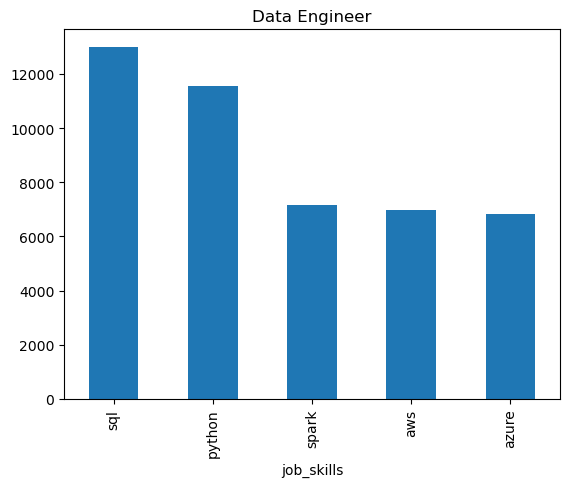

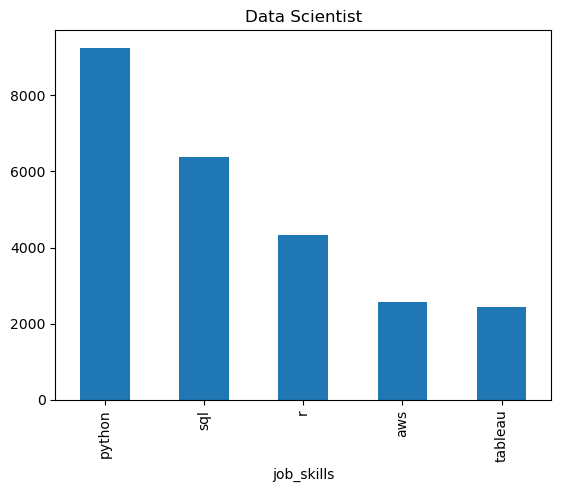

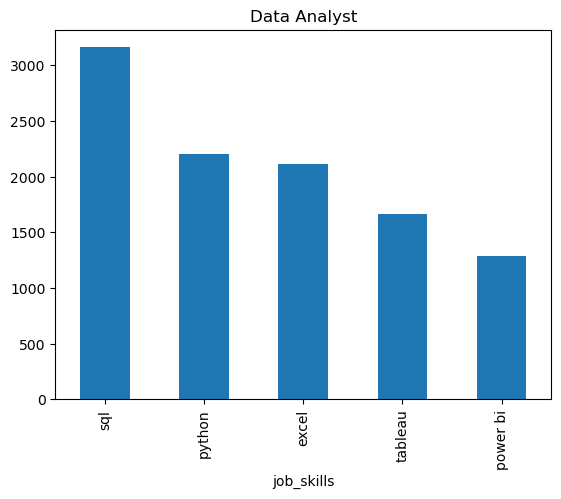

In [8]:
for role in top_roles.index:
    top3_role_skills[role].sort_values(ascending=False).head(5).plot(kind='bar',title=role)
    plt.show()

Identifying how skills are trending for Data analyst roles in India

In [9]:
df_exploded['month_no'] = df_exploded['job_posted_date'].dt.month
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'...",6
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'...",6
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'...",6
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'...",6
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,c#,"{'programming': ['c#', 'sql']}",3
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,sql,"{'programming': ['c#', 'sql']}",3
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None,3
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}",3


In [10]:
df_exploded['month_name'] = pd.to_datetime(df_exploded['month_no'], format='%m').dt.strftime('%B')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no,month_name
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'...",6,June
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'...",6,June
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'...",6,June
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'...",6,June
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'...",6,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,c#,"{'programming': ['c#', 'sql']}",3,March
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,sql,"{'programming': ['c#', 'sql']}",3,March
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None,3,March
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}",3,March


In [11]:
df_DA = df_exploded[df_exploded['job_title_short']=='Data Analyst'].copy()
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no,month_name
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",sql,"{'analyst_tools': ['power bi', 'excel', 'word'...",7,July
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",python,"{'analyst_tools': ['power bi', 'excel', 'word'...",7,July
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",databricks,"{'analyst_tools': ['power bi', 'excel', 'word'...",7,July
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",power bi,"{'analyst_tools': ['power bi', 'excel', 'word'...",7,July
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",excel,"{'analyst_tools': ['power bi', 'excel', 'word'...",7,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,shell,"{'analyst_tools': ['tableau', 'microstrategy']...",1,January
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,sql server,"{'analyst_tools': ['tableau', 'microstrategy']...",1,January
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,tableau,"{'analyst_tools': ['tableau', 'microstrategy']...",1,January
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,microstrategy,"{'analyst_tools': ['tableau', 'microstrategy']...",1,January


In [12]:
top5_DA_skills=df_DA['job_skills'].value_counts().head(5)
top5_DA_skills

job_skills
sql         3159
python      2203
excel       2117
tableau     1667
power bi    1286
Name: count, dtype: int64

Getting month-wise top 5 job skills

In [13]:
df_DA_piv = df_DA.pivot_table(index='month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_piv.loc['sum']=df_DA_piv.sum()
df_DA_piv.sort_values(by='sum',axis=1,ascending=False,inplace=True)
df_DA_piv.drop('sum',axis=0,inplace=True)
monthwiseskills = df_DA_piv.iloc[:,0:5]
monthwiseskills

job_skills,sql,python,excel,tableau,power bi
month_no,,,,,
1,305,216,218,159,98
2,209,148,156,116,75
3,229,151,138,125,76
4,204,143,138,98,83
5,155,101,106,71,61
6,193,150,115,114,77
7,245,161,174,124,93
8,317,216,192,152,127
9,341,229,228,195,168


In [14]:
monthwiseskills.reset_index(inplace=True)
monthwiseskills

job_skills,month_no,sql,python,excel,tableau,power bi
0,1,305,216,218,159,98
1,2,209,148,156,116,75
2,3,229,151,138,125,76
3,4,204,143,138,98,83
4,5,155,101,106,71,61
5,6,193,150,115,114,77
6,7,245,161,174,124,93
7,8,317,216,192,152,127
8,9,341,229,228,195,168
9,10,269,185,193,153,110


In [15]:
monthwiseskills['month_name'] = pd.to_datetime(monthwiseskills['month_no'], format='%m').dt.strftime('%B')
monthwiseskills

C:\Users\prash\AppData\Local\Temp\ipykernel_13484\1740117092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthwiseskills['month_name'] = pd.to_datetime(monthwiseskills['month_no'], format='%m').dt.strftime('%B')


job_skills,month_no,sql,python,excel,tableau,power bi,month_name
0,1,305,216,218,159,98,January
1,2,209,148,156,116,75,February
2,3,229,151,138,125,76,March
3,4,204,143,138,98,83,April
4,5,155,101,106,71,61,May
5,6,193,150,115,114,77,June
6,7,245,161,174,124,93,July
7,8,317,216,192,152,127,August
8,9,341,229,228,195,168,September
9,10,269,185,193,153,110,October


In [16]:
monthwiseskills.set_index('month_name',inplace=True)
monthwiseskills

job_skills,month_no,sql,python,excel,tableau,power bi
month_name,,,,,,
January,1,305,216,218,159,98
February,2,209,148,156,116,75
March,3,229,151,138,125,76
April,4,204,143,138,98,83
May,5,155,101,106,71,61
June,6,193,150,115,114,77
July,7,245,161,174,124,93
August,8,317,216,192,152,127
September,9,341,229,228,195,168


In [17]:
monthwiseskills.drop('month_no',axis=1,inplace=True)
monthwiseskills

C:\Users\prash\AppData\Local\Temp\ipykernel_13484\1336263166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthwiseskills.drop('month_no',axis=1,inplace=True)


job_skills,sql,python,excel,tableau,power bi
month_name,,,,,
January,305,216,218,159,98
February,209,148,156,116,75
March,229,151,138,125,76
April,204,143,138,98,83
May,155,101,106,71,61
June,193,150,115,114,77
July,245,161,174,124,93
August,317,216,192,152,127
September,341,229,228,195,168


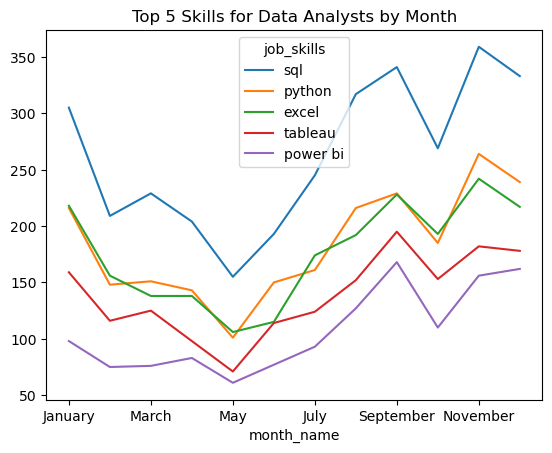

In [18]:
monthwiseskills.plot(kind='line',title='Top 5 Skills for Data Analysts by Month')
plt.show()

Analyzing pay for in demand DA skills in India

In [19]:
df_DA_topskills = df_DA[df_DA['job_skills'].isin(top5_DA_skills.index)]
df_groupped= df_DA_topskills.groupby('job_skills').agg(median_salary=('salary_year_avg','median'),skill_demand=('job_skills','size')).sort_values(by='median_salary',ascending=False)
df_groupped

,median_salary,skill_demand
job_skills,,
power bi,111175.0,1286
tableau,108087.5,1667
excel,98500.0,2117
python,96050.0,2203
sql,96050.0,3159


Most optimal skill to learn as a DA in India (high paying vs high in demand skills)

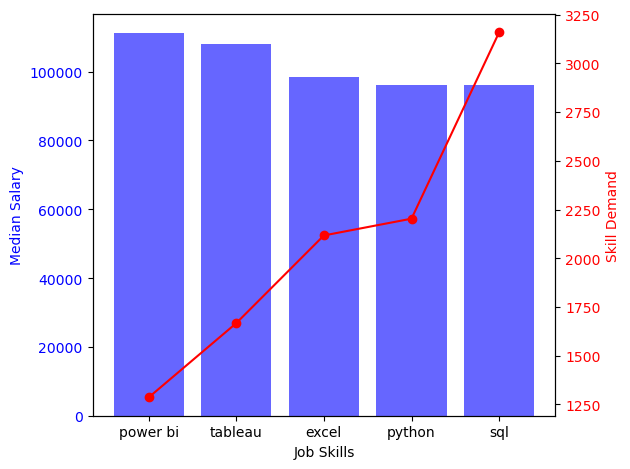

In [20]:
fig,ax= plt.subplots()

ax.bar(df_groupped.index,df_groupped['median_salary'],color='b',alpha=0.6)
ax.set_xlabel('Job Skills')
ax.set_ylabel('Median Salary', color='b')
ax.tick_params(axis='y', labelcolor='b')

ax2=ax.twinx()
ax2.plot(df_groupped.index,df_groupped['skill_demand'],color='r',marker='o')
ax2.set_ylabel('Skill Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.show()


Conclusion: Since the pay gap is not too high, but skill demand gaps are high. A person would be better off learning SQL. 

Exploring other areas of the dataset

Top job locations in India

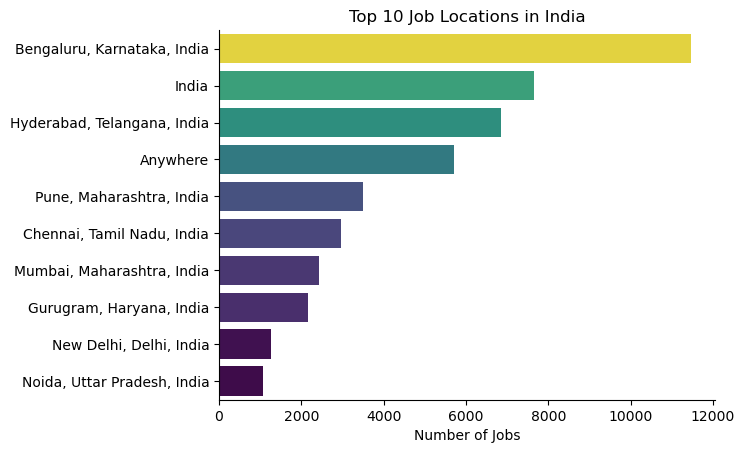

In [21]:
df_plot= df_ind['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot,x='count',y='job_location',palette='viridis',hue='count',legend=False)
plt.title('Top 10 Job Locations in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()  #removing border around plot
plt.show()



Exploring jobs offered in India by WFH offered, Degree requirement, and Health insurance offered

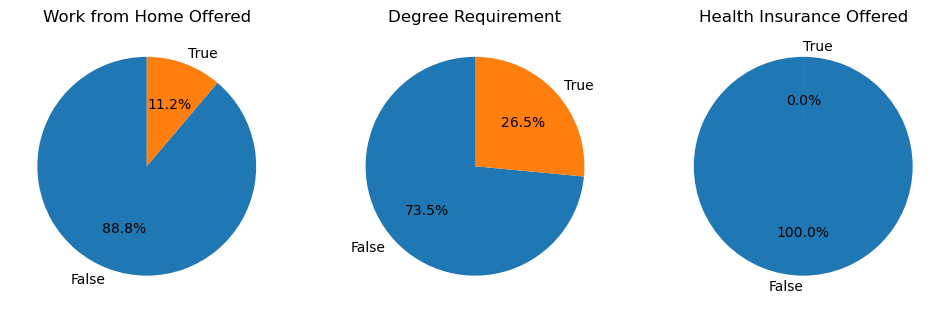

In [22]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_ind[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

Which 10 companies are offering the most jobs in India?

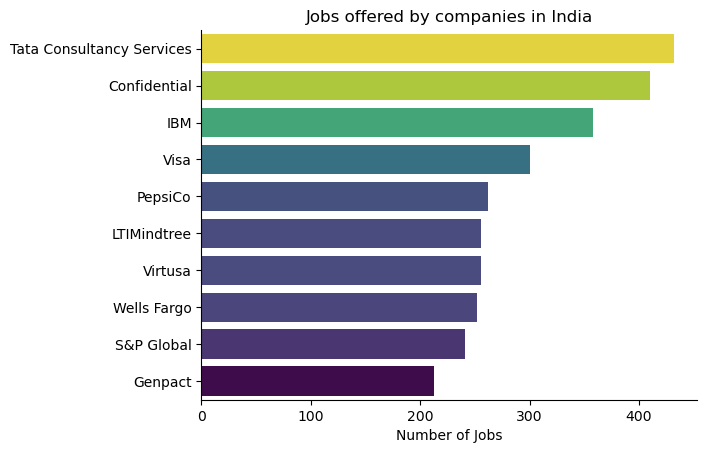

In [23]:
df_plot= df_ind['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot,x='count',y='company_name',palette='viridis',hue='count',legend=False)
plt.title('Jobs offered by companies in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()  #removing border around plot
plt.show()